In [18]:
from LCSPS import LCSPS
from LCSPSLane import LCSPSLane

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import sys 

sys.path.append('/Users/thinhhoang/Documents/anomaly-detection-ngsim/lanechange')

pfile = pickle.load(open( "lane.pyo", "rb" ))
tvec = pfile['t_vec'][0]
xvec = pfile['x_vec']

fpca_discretized = pickle.load(open('fpca.pyo', 'rb'))
basis = fpca_discretized.components_.data_matrix.reshape((-1,fpca_discretized.components_.data_matrix.shape[1])).transpose()
basis = basis[:,:2]
mean = fpca_discretized.mean_.data_matrix.reshape((-1,1))

lcdts = pickle.load(open('lcsp.pyo','rb'))

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


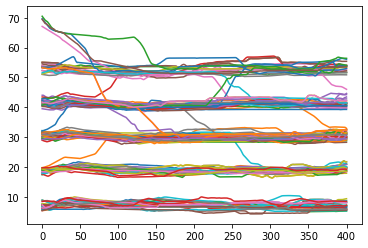

In [13]:
for i in range(xvec.shape[0]):
    plt.plot(xvec[i,:])

(array([4., 2., 2., 2., 2., 3., 3., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 2., 1., 2., 2., 2., 5., 4., 3., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 2., 3., 3., 3., 0., 7., 2., 2., 4., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 2., 4., 0., 2., 7., 1., 3., 2., 1., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 2., 1., 0., 0., 2., 0., 2., 3., 2., 1., 0., 1., 3.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.]),
 array([ 5.431   ,  5.756335,  6.08167 ,  6.407005,  6.73234 ,  7.057675,
         7.38301 ,  7.708345

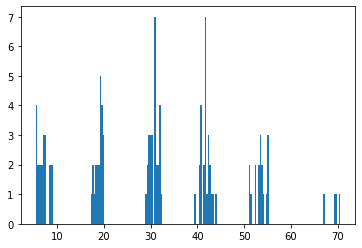

In [17]:
plt.hist(xvec[:,0], bins=200)

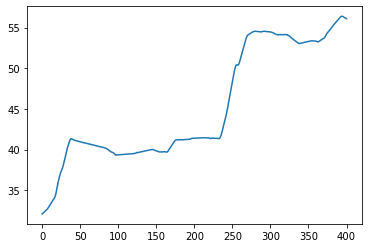

In [48]:
sample_traj = xvec[90,:]

# sample_traj = np.zeros_like(mean)
# sample_traj[:24] = (lcdts[0].reshape((-1,1)) - mean)[0]
# sample_traj[24:] = (lcdts[0].reshape((-1,1)) - mean)[:-24]
# sample_traj = xvec[16,:]
plt.plot(sample_traj)
plt.show()

Text(0.5, 1.0, 'Mean')

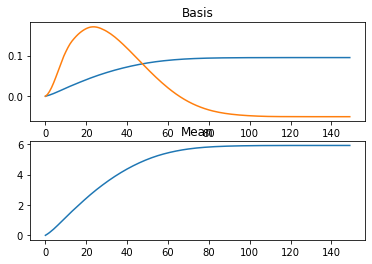

In [27]:
plt.subplot(2,1,1)
for i in range(basis.shape[1]):
    plt.plot(basis[:,i])
plt.title('Basis')
plt.subplot(2,1,2)
plt.plot(mean)
plt.title('Mean')

In [28]:
basis.shape

(150, 2)

## Detection code

In [69]:
lcs = LCSPSLane(
    np.array([[0],[0]]),
    np.array([[1000,0],[0,1000]]),
    0.5,
    mean,
    basis,
    [5.0, 14.5, 30.0, 42.0, 53.0]
)

Initialization of LCSPS completed


In [70]:
for i in range(300):
    lcs.add_datum(sample_traj[i])
print('Completed adding datums into the LCS')

Completed adding datums into the LCS


In [71]:
pij = lcs.marginalize_repr_all_subseqs()
ck = lcs.get_change_point(pij, K=2)

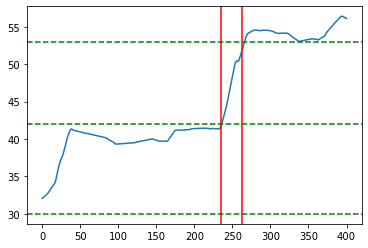

In [72]:
plt.plot(sample_traj)
for i in range(len(ck)):
    if i>0 and i<len(ck)-1:
        plt.axvline(x=ck[i], color='r')
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=42, color='g', linestyle='--')
plt.axhline(y=53, color='g', linestyle='--')